# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

C:\Users\User\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\User\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000L, 784L)
label shape: (70000L,)


#### (1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

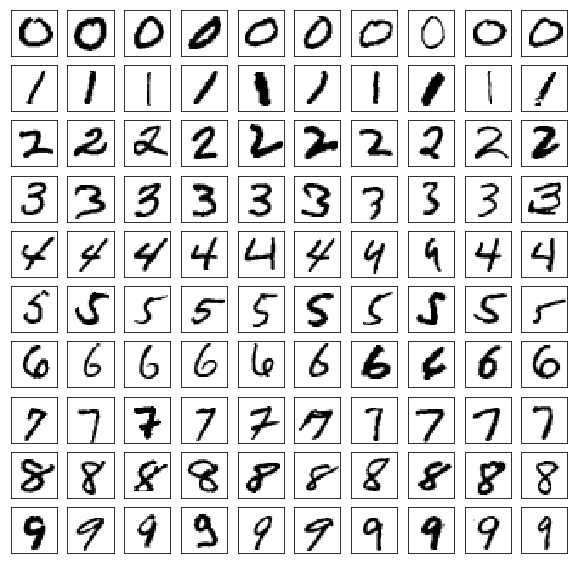

In [40]:
def P1(num_examples=10):

### STUDENT START ###

    # Prints the first 10 instances of each number to screen
    
    # Set up figure
    plt.figure(figsize=(num_examples, num_examples))
    plt.rc('image', cmap='binary', interpolation='none')
    
    # Initialize Count of each image label (number)
    count = {i:0 for i in range(num_examples)}
    total_plot_count = 0
    
    # Continue to loop through the training data until 10 plots of the same number are printed, then move to next number
    for number, plot_count in count.items():
        index = 0
        while plot_count < num_examples:
            if mini_train_labels[index] == number:
                
                # Plot to Screen
                ax = plt.subplot(num_examples, num_examples, total_plot_count + 1)
                plt.setp(ax, xticks=(), yticks=())  
                plt.imshow(mini_train_data[index].reshape(28,28))
                
                # Increment Counts
                index += 1
                count[number] += 1
                plot_count += 1
                total_plot_count += 1
            
            else: # Continue to search training data for a label matching the current number
                index += 1

### STUDENT END ###

P1(10)

#### (2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [409]:
def P2(k_values):

### STUDENT START ###
    
    for each in k_values:
        
        # Initialize a KNN classifier and evaluate against the Dev set
        neigh = KNeighborsClassifier(each)
        neigh.fit(mini_train_data, mini_train_labels)
        predictions = neigh.predict(dev_data)

        # Print Classification Report if k=1
        if each == 1:
            print("NN = 1")
            print(classification_report(y_true = dev_labels, y_pred = predictions, target_names = [str(i) for i in range(10)]))

        # Print Accuracy
        print("Accuracy (NN = %i): %0.2f" % (each, neigh.score(dev_data, dev_labels)))
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

NN = 1
             precision    recall  f1-score   support

          0       0.91      0.98      0.94        99
          1       0.89      1.00      0.94       105
          2       0.99      0.79      0.88       102
          3       0.77      0.87      0.82        86
          4       0.89      0.82      0.85       104
          5       0.93      0.84      0.88        91
          6       0.94      0.96      0.95        98
          7       0.89      0.92      0.90       113
          8       0.94      0.88      0.91        96
          9       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Accuracy (NN = 1): 0.89
Accuracy (NN = 3): 0.88
Accuracy (NN = 5): 0.87
Accuracy (NN = 7): 0.86
Accuracy (NN = 9): 0.86


ANSWER: Looks like the most difficult digit to predict is the 9, as it has the lowest f1-score (a weighted average of both precision and recall).

#### (3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [408]:
def P3(train_sizes, accuracies):    

### STUDENT START ###

    # Define Classifier
    neigh = KNeighborsClassifier(1)
    
    # Loop through different training sizes and print results & computation time
    for each in train_sizes:
        
        t1 = time.time()
        
        neigh.fit(train_data[:each], train_labels[:each])
        score = neigh.score(dev_data, dev_labels)
        accuracies.append(score)
        
        t2 = time.time()
        
        print("Accuracy (Train Size = %i): %0.2f   Prediction Time: %i seconds" % (each, score, t2-t1))


### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Accuracy (Train Size = 100): 0.72   Prediction Time: 0 seconds
Accuracy (Train Size = 200): 0.79   Prediction Time: 0 seconds
Accuracy (Train Size = 400): 0.84   Prediction Time: 0 seconds
Accuracy (Train Size = 800): 0.88   Prediction Time: 0 seconds
Accuracy (Train Size = 1600): 0.90   Prediction Time: 1 seconds
Accuracy (Train Size = 3200): 0.93   Prediction Time: 3 seconds
Accuracy (Train Size = 6400): 0.94   Prediction Time: 7 seconds
Accuracy (Train Size = 12800): 0.96   Prediction Time: 14 seconds
Accuracy (Train Size = 25000): 0.97   Prediction Time: 29 seconds


#### (4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [228]:
def P4(train_sizes, accuracies):

### STUDENT START ###

    # Reshape lists into numpy arrays
    train_sizes = np.array(train_sizes).reshape(-1,1)
    accuracies = np.array(accuracies).reshape(-1,1)
    
    # Fit a Linear Model and Predict Accuracy at 60,000 data points
    reg = LinearRegression()
    reg.fit(train_sizes, accuracies)
    linear_prediction = reg.predict(60000)[0][0]
    
    # Apply a log transform to the independent variable & re-fit a linear model & predict
    log_train_sizes = np.log10(train_sizes)
    reg.fit(log_train_sizes, accuracies)
    log_prediction = reg.predict(np.log10(60000))[0][0]
    
    # Print Results to Screen
    print("Prediction at 60,000 training points:")
    print("Assuming a Linear Trend: %0.2f" % linear_prediction)
    print("Assuming a Logarithmic Trend: %0.2f" % log_prediction)
    

### STUDENT END ###

P4(train_sizes, accuracies)

Prediction at 60,000 training points:
Assuming a Linear Trend: 1.24
Assuming a Logarithmic Trend: 1.03


ANSWER: The problem with using regression here is that the regular OLS regression doesn't care that there is a practical limit of 100% accuracy and will fit a straight line to the data regardless of whether the data shows a linear trend or not. Likely, the underlying distribution of training size vs accuracy is logarithmic and applying a log transform to the sizes variable could adjust the linear regression line to something more representative of the data. 

#### (5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion Matrix
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]
The most confused pair of digits appears to be 9 and 4.

Some Errors
Predicted Number: 4  Actual Number: 9
Predicted Number: 3  Actual Number: 8
Predicted Number: 4  Actual Number: 6
Predicted Number: 6  Actual Number: 0
Predicted Number: 1  Actual Number: 7


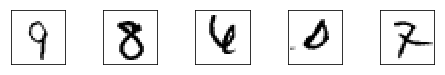

In [411]:
def P5():

### STUDENT START ###

    # Fit KNN=1 Classifier
    neighb = KNeighborsClassifier(n_neighbors = 1)
    neighb.fit(mini_train_data, mini_train_labels)
    predicted = neighb.predict(dev_data)
    
    # Build Confusion Matrix
    confusion = confusion_matrix(dev_labels, predicted) 
    
    print("Confusion Matrix")
    print(confusion)
    print("The most confused pair of digits appears to be 9 and 4.")
    print("")
    
    # Print out 5 Example Errors
    print("Some Errors")
    
    # Set up figure
    plt.figure(figsize=(8,1))
    plt.rc('image', cmap='binary', interpolation='none')
    
    index = 0
    printouts = 0
    while printouts < 5:
        
        if dev_labels[index] != predicted[index]:
            
            print("Predicted Number: %i  Actual Number: %i" % (predicted[index], dev_labels[index]))
            # Plot to Screen
            ax = plt.subplot(1,5, printouts + 1)
            plt.setp(ax, xticks=(), yticks=())  
            plt.imshow(dev_data[index].reshape(28,28))
            printouts += 1
            
            index += 1
        
        else:
            index += 1
    
    
### STUDENT END ###

P5()

#### (6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Test Blur


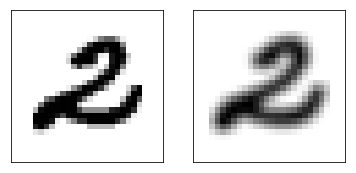

In [407]:
# Preprocessing Test

# Preprocessing Data by averaging a pixel and its surrounding pixels (gaussian blur) using constant weights


def create_pixel_blur_map():
    # A function to store the correct indices for each pixel's adjacent pixels in a 28x28 grid
    
    surrounding_pixels_by_pixel = []
    for pixel_num in range(784):
        row_ref = int(np.floor(pixel_num / 28))
        col_ref = pixel_num % 28
        surrounding_pixel_indices = []

        # Ensure we don't extend beyond the 28x28 grid
        if row_ref != 0:
            if col_ref != 0:
                surrounding_pixel_indices.append((row_ref - 1, col_ref - 1))
            if col_ref != 27:
                surrounding_pixel_indices.append((row_ref - 1, col_ref + 1))
            surrounding_pixel_indices.append((row_ref - 1, col_ref))

        if row_ref != 27:
            if col_ref != 0:
                surrounding_pixel_indices.append((row_ref + 1, col_ref - 1))
            if col_ref != 27:
                surrounding_pixel_indices.append((row_ref + 1, col_ref + 1))
            surrounding_pixel_indices.append((row_ref + 1, col_ref))

        if col_ref != 0:
            surrounding_pixel_indices.append((row_ref, col_ref - 1))
        if col_ref != 27:
            surrounding_pixel_indices.append((row_ref, col_ref + 1))   
        
        # Add the current cell, too
        surrounding_pixel_indices.append((row_ref, col_ref))
        

        surrounding_pixels_by_pixel.append(surrounding_pixel_indices)

    return surrounding_pixels_by_pixel

# Create Pixel Blur Map
pixel_blur_map = create_pixel_blur_map()

# Set up figure
plt.rc('image', cmap='binary', interpolation='none')

# Pick a random number & plot
test_image = mini_train_data[3]
print("Test Blur")
ax = plt.subplot(1,2, 1)
plt.setp(ax, xticks=(), yticks=())  
plt.imshow(test_image.reshape(28,28))


def gaussian_blur_image(original_image_flat):
    # Function to apply a Gaussian blur to each pixel in a 784 pixel vector (depicting a 28x28 grid)
    
    original_image = original_image_flat.reshape(28,28)
    blurred_image = []
    pixel = 0
    while pixel < 784:
        new_pixel_value = 0
        blur_values = []
        for adjacent_pixels in pixel_blur_map[pixel]:
            blur_values.append(original_image[adjacent_pixels[0]][adjacent_pixels[1]])
        new_pixel_value = np.mean(blur_values)
        blurred_image.append(new_pixel_value)
        pixel += 1
        
    return np.array(blurred_image)

# Blur and Plot the Test Image
blurred_image_test = gaussian_blur_image(test_image)
ax = plt.subplot(1,2, 2)
plt.setp(ax, xticks=(), yticks=())  
plt.imshow(blurred_image_test.reshape(28,28))


In [412]:
def P6():
    
### STUDENT START ###

    # Preprocess Training Data
    mini_train_data_blur = [gaussian_blur_image(i) for i in mini_train_data]
    
    # Preprocess Dev Data
    dev_data_blur = [gaussian_blur_image(i) for i in dev_data]
    
    # Fit KNN=1 Classifier for preprocessed training data, regular dev set
    neighb_A = KNeighborsClassifier(n_neighbors = 1)
    neighb_A.fit(mini_train_data_blur, mini_train_labels)
    print("Preprocessed Train, Normal Dev Accuracy: %0.2f" % neighb_A.score(dev_data, dev_labels))
          
    # Fit KNN=1 Classifier for regular training data, preprocessed dev set
    neighb_B = KNeighborsClassifier(n_neighbors = 1)
    neighb_B.fit(mini_train_data, mini_train_labels)
    print("Normal Train, Preprocessed Dev Accuracy: %0.2f" % neighb_B.score(dev_data_blur, dev_labels))
          
    # Fit KNN=1 Classifier for preprocessed training data, preprocessed dev set
    neighb_C = KNeighborsClassifier(n_neighbors = 1)
    neighb_C.fit(mini_train_data_blur, mini_train_labels)
    print("Preprocessed Train, Preprocessed Dev Accuracy: %0.2f" % neighb_C.score(dev_data_blur, dev_labels))


### STUDENT END ###

P6()

Preprocessed Train, Normal Dev Accuracy: 0.91
Normal Train, Preprocessed Dev Accuracy: 0.87
Preprocessed Train, Preprocessed Dev Accuracy: 0.90


#### (7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [251]:
def P7():

### STUDENT START ###

    # Fit a Gaussian Naive Bayes model. No need to adjust feature data, as it is already in the form of prior probabilities (0-1)
    gauNB = GaussianNB()
    gauNB.fit(mini_train_data, mini_train_labels)
    print("Gaussian NB Accuracy on Dev: %0.2f " % gauNB.score(dev_data, dev_labels))

    # Fit a Bernoulli Naive Bayes model. Use a threshold of 0.5 to create binary variables. 
    for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    
        bernNB = BernoulliNB(binarize=i)
        bernNB.fit(mini_train_data, mini_train_labels)
        print("Bernoulli NB (i = %0.1f) Accuracy on Dev: %0.2f " % (i, bernNB.score(dev_data, dev_labels)))
    
    # Fit a Multinomial Naive Bayes model. Use a threshold of 0.5 to create binary variables. 
    def multivariate_map(flat_image):
        new_image = []
        for pixel in flat_image:
            if pixel == 0:
                new_image.append(0)
            elif pixel == 1:
                new_image.append(2)
            else:
                new_image.append(1)
        return new_image
        
    # Preprocess Training Set
    mini_train_data_multi = [multivariate_map(i) for i in mini_train_data]
    
    multiNB = MultinomialNB()
    multiNB.fit(mini_train_data_multi, mini_train_labels)
    print("Multinomial NB Accuracy on Dev: %0.2f " % multiNB.score(dev_data, dev_labels))    
    
### STUDENT END ###

P7()

Gaussian NB Accuracy on Dev: 0.62 
Bernoulli NB (i = 0.1) Accuracy on Dev: 0.81 
Bernoulli NB (i = 0.2) Accuracy on Dev: 0.82 
Bernoulli NB (i = 0.3) Accuracy on Dev: 0.82 
Bernoulli NB (i = 0.4) Accuracy on Dev: 0.82 
Bernoulli NB (i = 0.5) Accuracy on Dev: 0.81 
Bernoulli NB (i = 0.6) Accuracy on Dev: 0.81 
Bernoulli NB (i = 0.7) Accuracy on Dev: 0.80 
Bernoulli NB (i = 0.8) Accuracy on Dev: 0.80 
Bernoulli NB (i = 0.9) Accuracy on Dev: 0.77 
Multinomial NB Accuracy on Dev: 0.79 


ANSWER: It appears that the multi-class version typically does not increase accuracy over the bernoulli NB model, except when a binarize threshold of 0.9 is used in the bernoulli model. This is likely because there will be fewer pixels that are fully black in the multinomial approach which increases the sparse-ness of the images and reduces predictive power. 

#### (8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [297]:
def P8(alphas):

### STUDENT START ###
    
    # GridSearchCV for multiple Alphas in a Bernoulli NB model
    bernNB = BernoulliNB(binarize = 0.5)
    
    gs = GridSearchCV(bernNB, param_grid=alphas)
    
    gs.fit(mini_train_data, mini_train_labels)
    print("Bernoulli NB Model, various Alphas and Binarize = 0.5")
    print("Accuracy: %0.2f" % gs.score(dev_data, dev_labels))
    print("Best Alpha: %0.2f" % gs.best_params_['alpha'])
    
    # When alpha == 0
    bernNB2 = BernoulliNB(alpha = 0, binarize = 0.5)
    bernNB2.fit(mini_train_data, mini_train_labels)
    print("Bernoulli NB Model, Alpha = 0 and Binarize = 0.5")
    print("Accuracy: %0.2f" % bernNB2.score(dev_data, dev_labels))

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

Bernoulli NB Model, various Alphas and Binarize = 0.5
Accuracy: 0.82
Best Alpha: 0.01
Bernoulli NB Model, Alpha = 0 and Binarize = 0.5
Accuracy: 0.10


ANSWER: Yes, I would expect a Naive Bayes model with zero smoothing and only 1000 data points in the training data set to have poor performance when trying to generalize to another dataset, simply because of the high inherent randomness and variability in how people physically draw different numbers. Naive Bayes is an excellent estimator when data sets are large, though when data sets are small the randomness of the training data can easily throw off its predictive ability. 

#### (9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

Original Accuracy: 0.62
Adjusted Model Accuracy: 0.79


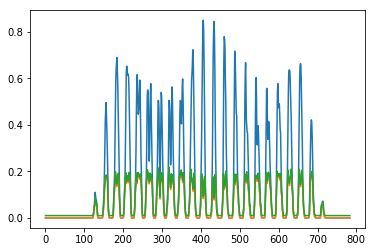

In [436]:
def P9():

### STUDENT END ###

    # Original Gaussian Model, no preprocessing
    gnb = GaussianNB()
    gnb.fit(mini_train_data, mini_train_labels)
    print("Original Accuracy: %0.2f" % gnb.score(dev_data, dev_labels))

    # Look at the distribution of pixels visually
    plt.plot(gnb.theta_[8])
    plt.plot(gnb.sigma_[8])
    # Sigma is occasionally 0, which would mean that the mean at that pixel is never expected to change. This is not reflective
    # of reality. 
    
    # Add an arbitrary but small value to the standard deviation for each prediction. See explanation below.
    gnb.sigma_ += 0.01
    plt.plot(gnb.sigma_[8])
    
    # Check new accuracy for the model with adjusted sigmas
    print("Adjusted Model Accuracy: %0.2f" % gnb.score(dev_data, dev_labels))

### STUDENT END ###

gnb = P9()

ANSWER: Add an arbitrary but small value to the standard deviation for each prediction. This prevents a standard deviation from having a value of 0, which essentially states that the value for those pixels is always expected to be exactly equal to the mean, which we know is not expected. By introducing some small variation, it makes the model more flexible and therefore helps it generalize. 

#### (10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

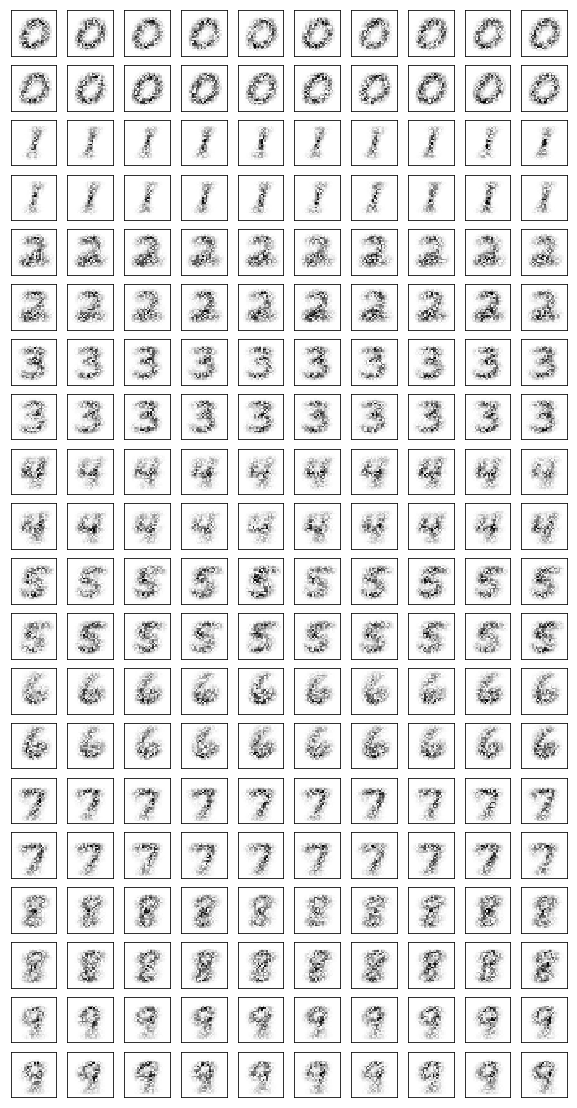

In [386]:
def P10(num_examples):

### STUDENT START ###

    # Fit Model
    BNB = BernoulliNB(binarize=0.5)
    BNB.fit(train_data, train_labels)
    
    # Predict a vector for a given number (think I need the round() in here to output a 0 or 1 for each pixel, 
    # though I wasn't sure because excluding it seems to make the plotted numbers a bit more clear?)
    new_number = np.array([round(i*np.random.rand()) for i in np.exp(BNB.feature_log_prob_[0])])
    
    # Set up figure
    plt.figure(figsize=(10, num_examples))
    plt.rc('image', cmap='binary', interpolation='none')
    
    # Initialize Count of each image label (number)
    count = {i:0 for i in range(10)}
    total_plot_count = 0
    
    # Continue to loop through the training data until 20 plots of the same number are printed, then move to next number
    for number, plot_count in count.items():

        while plot_count < num_examples:

            # Plot to Screen
            ax = plt.subplot(num_examples, 10, total_plot_count + 1)
            plt.setp(ax, xticks=(), yticks=())  
            plt.imshow(np.array([i*np.random.rand() for i in np.exp(BNB.feature_log_prob_[number])]).reshape(28,28))

            # Increment Counts
            count[number] += 1
            plot_count += 1
            total_plot_count += 1
            
### STUDENT END ###

P10(20)

ANSWER: The predicted digits are distinguishable! But they are not as crisp (are more blurry) than the training digits were.

#### (11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [402]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    # Fit Bernoulli NB model and make predictions & probabilities
    BNB = BernoulliNB()
    BNB.fit(mini_train_data, mini_train_labels)
    predictions = BNB.predict(dev_data)
    prob_predictions = BNB.predict_proba(dev_data)
    
    # Loop through each prediction made by the model
    i = 0
    while i < len(prob_predictions):
        current = max(prob_predictions[i])
        current_index = prob_predictions[i].argmax(axis=0)
        
        # Loop through each bucket
        index = 0
        while index < len(buckets):
            # If probability > bucket threshold, increment total count in that bin
            if current >= buckets[index]:
                total[index] += 1
                # If predicted number == actual number, increment correct count in that bin
                if dev_labels[i] == predictions[i]:
                    correct[index] += 1
            
            # continue while loops
            index += 1
        i += 1
        
    return correct, total
                   
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0. for i in buckets]
total = [0. for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

800.0
972.0
0.82304526749
p(pred) <= 0.5000000000000    total = 1000    accuracy = 0.815
p(pred) <= 0.9000000000000    total = 972    accuracy = 0.823
p(pred) <= 0.9990000000000    total = 902    accuracy = 0.854
p(pred) <= 0.9999900000000    total = 843    accuracy = 0.878
p(pred) <= 0.9999999000000    total = 780    accuracy = 0.903
p(pred) <= 0.9999999990000    total = 723    accuracy = 0.924
p(pred) <= 0.9999999999900    total = 657    accuracy = 0.945
p(pred) <= 0.9999999999999    total = 601    accuracy = 0.953
p(pred) <= 1.0000000000000    total = 585    accuracy = 0.957


ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()